### Function 정리

In [2]:
### sample data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


df_train = pd.read_csv('./house_train.csv')
print(df_train.shape)

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(1460, 81)


In [9]:
#print(df_train.info())

In [10]:
df = df_train[['SalePrice', 'YearBuilt','SaleType', 'SaleCondition']]
df.head()

,SalePrice,YearBuilt,SaleType,SaleCondition
0,208500,2003,WD,Normal
1,181500,1976,WD,Normal
2,223500,2001,WD,Normal
3,140000,1915,WD,Abnorml
4,250000,2000,WD,Normal


In [7]:
df.groupby(by=['SaleType']).count()

,SalePrice
SaleType,
COD,43
CWD,4
Con,2
ConLD,9
ConLI,5
ConLw,5
New,122
Oth,3
WD,1267


### Histogram, QQ plot, Box plot

In [29]:
### Plot 그리기

## df : dataframe
## feature : feature Name 

def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,6))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :1])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :1])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 1])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

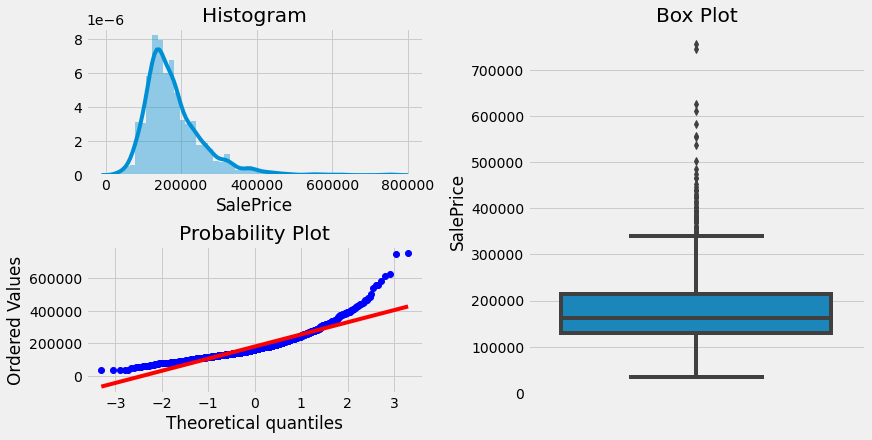

In [30]:
plotting_3_chart(df_train, 'SalePrice')

### Missing Data Ratio

In [32]:
########## missing data
# df : dataframe

df = df
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum() / df.isnull().count()) * 100).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.reset_index()
missing_data.columns = ['Name', 'Total', 'Percent']
missing_data[:10]

,Name,Total,Percent
0,SaleCondition,0,0.0
1,SaleType,0,0.0
2,YearBuilt,0,0.0
3,SalePrice,0,0.0


### Feature Engineering - skew

In [33]:
import numpy as np
from scipy.stats import skew, kurtosis, boxcox_normmax
from scipy.special import boxcox1p
from scipy import stats

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerics2 = []
for i in df.columns:
    if df[i].dtype in numeric_dtypes:
        numerics2.append(i)
skew_features = df[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

### 기준점 0.5, 1, 2 
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    df[i] = boxcox1p(df[i], boxcox_normmax(df[i] + 1))

In [34]:
print(skew_features)

SalePrice    1.880941
YearBuilt   -0.612831
dtype: float64


### 평가지표

In [ ]:
from sklearn.metrics import mean_squared_error #Mean squared error regression loss.
from sklearn.model_selection import cross_val_score

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

def RMSE (y,pred):
    return np.sqrt(np.mean(np.square(y - pred)))